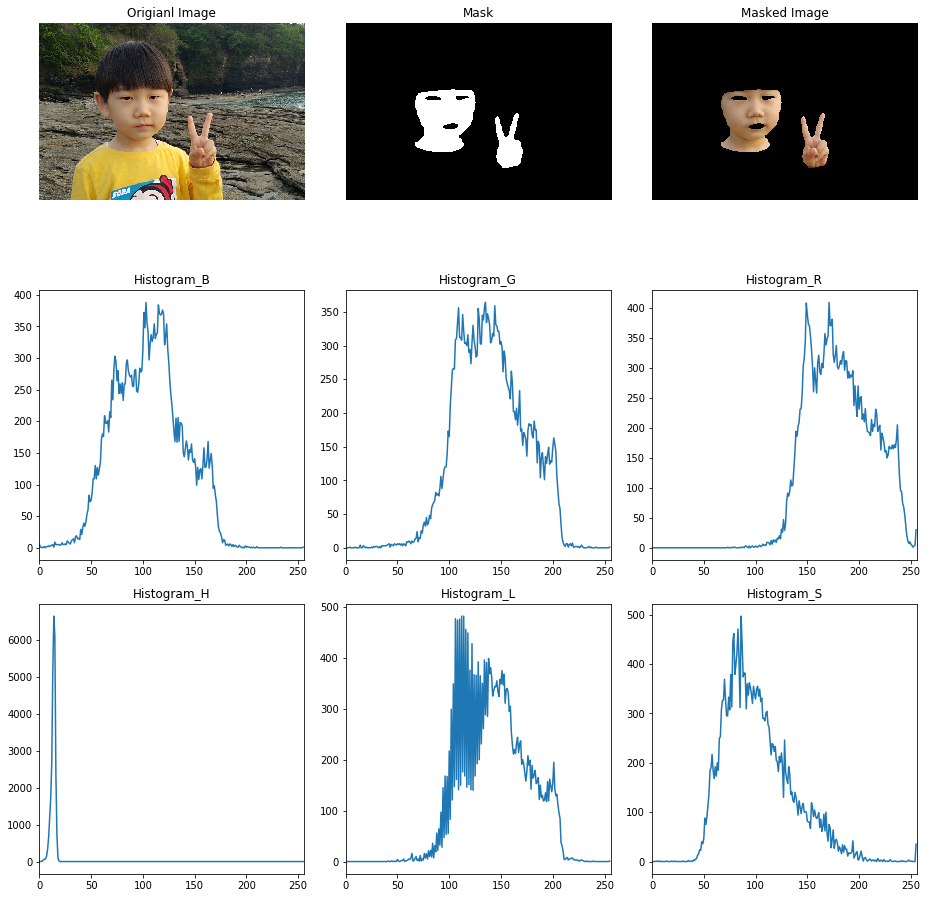

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 기준 영상 읽어오기
img_m = cv2.imread('model.png')
mask = cv2.imread('mask.bmp', cv2.IMREAD_GRAYSCALE)
masked_img = cv2.bitwise_and(img_m, img_m, mask=mask)

# 기준 영상의 R,G,B 채널 히스토그램 계산
hist_b = cv2.calcHist([img_m], [0], mask, [256], [0,256])
hist_g = cv2.calcHist([img_m], [1], mask, [256], [0,256])
hist_r = cv2.calcHist([img_m], [2], mask, [256], [0,256])
#hist_rgb = cv2.calcHist([img_m], [0,1,2], mask, [256], [0,256])

# RGB -> HSL 변환
hls_m = cv2.cvtColor(img_m, cv2.COLOR_BGR2HLS)

# 기준 영상의 H,S,L 채널 히스토그램 계산
hist_h = cv2.calcHist([hls_m], [0], mask, [256], [0,256])
hist_l = cv2.calcHist([hls_m], [1], mask, [256], [0,256])
hist_s = cv2.calcHist([hls_m], [2], mask, [256], [0,256])

# 기준 영상 및 히스토그램 시각화
plt.figure(figsize=(13, 13))

# cv2.cvtColor(img_m, cv2.COLOR_BGR2RGB)
plt.subplot(331), plt.imshow(img_m[...,::-1]), plt.title('Origianl Image'), plt.axis('off')
plt.subplot(332), plt.imshow(mask,'gray'), plt.title('Mask'), plt.axis('off')
plt.subplot(333), plt.imshow(masked_img[...,::-1]), plt.title('Masked Image'), plt.axis('off')

plt.subplot(334), plt.plot(hist_b), plt.title('Histogram_B'), plt.xlim([0,256])
plt.subplot(335), plt.plot(hist_g), plt.title('Histogram_G'), plt.xlim([0,256])
plt.subplot(336), plt.plot(hist_r), plt.title('Histogram_R'), plt.xlim([0,256])

plt.subplot(337), plt.plot(hist_h), plt.title('Histogram_H'), plt.xlim([0,256])
plt.subplot(338), plt.plot(hist_l), plt.title('Histogram_L'), plt.xlim([0,256])
plt.subplot(339), plt.plot(hist_s), plt.title('Histogram_S'), plt.xlim([0,256])

plt.tight_layout()
plt.show()

In [2]:
import cv2
import numpy as np

# 기준 영상 불러오기
img_m = cv2.imread('model.png')
mask = cv2.imread('mask.bmp', cv2.IMREAD_GRAYSCALE)

## 기준 영상의 H-S 히스토그램 생성
hls_m = cv2.cvtColor(img_m, cv2.COLOR_BGR2HLS)
hist_m = cv2.calcHist([hls_m], [0,2], mask, [181,256], [0,181,0,256])

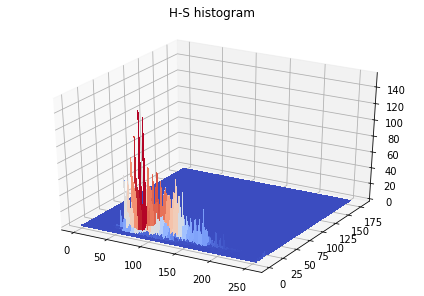

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(256)
Y = np.arange(181)
X,Y = np.meshgrid(X,Y)

surf = ax.plot_surface(X,Y,hist_m, cmap='coolwarm', linewidth=0, antialiased=False)

fig.tight_layout()
plt.title('H-S histogram')
plt.show()

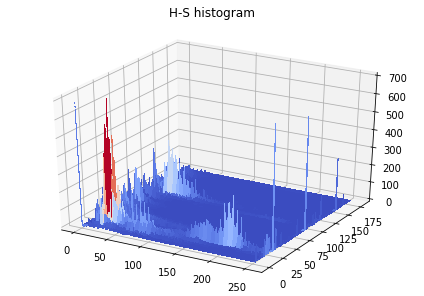

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

img_i = cv2.imread('test.png')
hls_i = cv2.cvtColor(img_i, cv2.COLOR_BGR2HLS)

hist_i = cv2.calcHist([hls_i], [0,2], None, [181,256], [0,181,0,256])
hist_i = np.minimum(hist_i, 700)

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(256)
Y = np.arange(181)
X,Y = np.meshgrid(X,Y)

surf = ax.plot_surface(X,Y,hist_i, cmap='coolwarm', linewidth=0, antialiased=False)

fig.tight_layout()
plt.title('H-S histogram')
plt.show()

In [23]:
import cv2
import numpy as np

# 기준 영상 불러오기
img_m = cv2.imread('model.png')
mask = cv2.imread('mask.bmp', cv2.IMREAD_GRAYSCALE)

## 기준 영상의 H-S 히스토그램 생성
hls_m = cv2.cvtColor(img_m, cv2.COLOR_BGR2HLS)
hist_m = cv2.calcHist([hls_m], [0,2], mask, [181,256], [0,181,0,256])

In [34]:
## 입력 이미지의 H-S 히스토그램 계산
img_i = cv2.imread('test.png')
hls_i = cv2.cvtColor(img_i, cv2.COLOR_BGR2HLS)


## 히스토그램 역투영 수행
'''
To do
'''
result = cv2.calcBackProject([hls_i],[0,2],hist_r,[0,181,0,256],1)


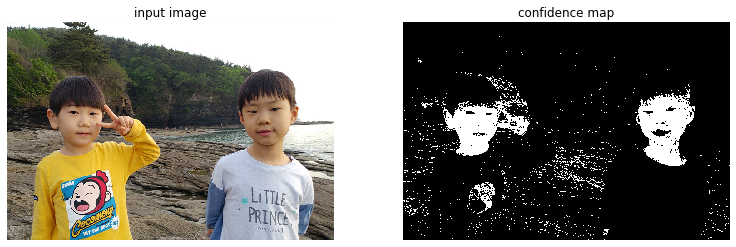

In [35]:
## 결과 시각화
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
plt.imshow(img_i[...,::-1])
plt.axis('off')
plt.title('input image')

plt.subplot(1,2,2)
plt.imshow(result,'gray')
plt.axis('off')
plt.title('confidence map')

plt.show()

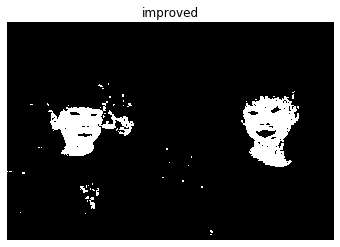

In [48]:
## 모폴로지 연산 적용
'''
To do
'''
kernel = np.ones((2, 2), np.uint8)
improved1 = cv2.erode(result,kernel, iterations = 2)
improved = cv2.dilate(improved1, kernel, iterations = 2)

plt.imshow(improved, 'gray')
plt.axis('off')
plt.title('improved')

plt.show()

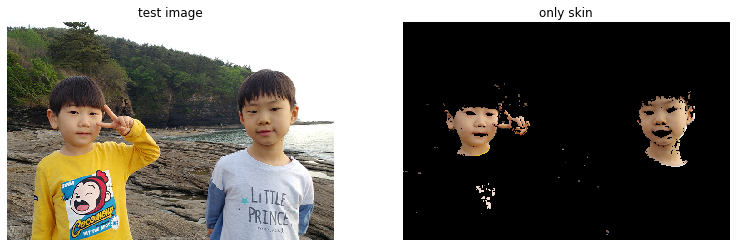

In [49]:
## 피부색 영역 검출
skin = cv2.bitwise_and(img_i, img_i, mask=improved.astype('uint8'))

plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
plt.imshow(img_i[...,::-1])
plt.axis('off')
plt.title('test image')

plt.subplot(1,2,2)
plt.imshow(skin[...,::-1])
plt.axis('off')
plt.title('only skin')

plt.show()